<a href="https://colab.research.google.com/github/andrespeedwork/Machine-Learning-Analytics/blob/main/Machine_Learning_e_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introdução

Projeto de Machine Learning: Classificação de Emails como Spam ou Não Spam

Este projeto visa desenvolver um modelo de Machine Learning para classificar automaticamente emails como spam ou não spam, ajudando a melhorar a experiência do usuário e proteger sistemas contra riscos como phishing e malware. O modelo será treinado usando um dataset de emails e explorará algoritmos como Naive Bayes, SVM e Random Forest para identificar as características que distinguem mensagens legítimas de indesejadas. O processo incluirá pré-processamento dos dados, extração de características e avaliação do desempenho com métricas como acurácia, precisão, recall e F1-score.


##Preparação do ambiente de Machine Learning & Analytics para o desenvolvimento do MVP

In [30]:
from google.colab import drive #(Preparando o ambiente para criação do MVP Machine Learning & Analytics)
drive.mount('/content/drive'),

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(None,)

In [31]:
import pandas as pd # Biblioteca fundamental para leitura, manipulação e análise de dados estruturados, especialmente em formato de tabelas (DataFrames).
import numpy as np # Biblioteca essencial para operações matemáticas e manipulação de grandes arranjos e matrizes multidimensionais, frequentemente usada para processamento de dados numéricos.
import matplotlib.pyplot as plt # Biblioteca amplamente utilizada para criação de gráficos e visualizações em 2D, essencial para análise exploratória de dados e apresentação de resultados.
from sklearn.model_selection import train_test_split # Função para dividir os dados em conjuntos de treinamento e teste, essencial para avaliar o desempenho do modelo em dados não vistos.
from sklearn.preprocessing import StandardScaler # Biblioteca responsável pela padronização dos dados, transformando as características de modo que possuam média zero e desvio padrão igual a um, melhorando a performance de modelos que dependem da escala dos dados.
from sklearn.ensemble import RandomForestClassifier # Implementação do algoritmo Random Forest (floresta aleatória), utilizado para classificação e regressão com alta robustez e capacidade de lidar com dados complexos e de alta dimensionalidade.
from sklearn.metrics import classification_report # Ferramenta para avaliar modelos de classificação, fornecendo métricas detalhadas como precisão, recall, F1-score e a matriz de confusão.
from sklearn.neighbors import KNeighborsClassifier # Implementação do algoritmo k-Nearest Neighbors (KNN), que classifica instâncias com base nas distâncias das instâncias mais próximas do conjunto de treinamento.
from sklearn.linear_model import LogisticRegression # Implementação da regressão logística, um modelo estatístico amplamente utilizado para problemas de classificação binária e multiclasse.
from sklearn.model_selection import GridSearchCV # Ferramenta para realizar a busca em grade (grid search), que ajuda a otimizar os hiperparâmetros do modelo, encontrando a melhor combinação para melhorar o desempenho do modelo.
from sklearn.model_selection import cross_val_score, StratifiedKFold # Ferramentas para realizar validação cruzada do modelo, com a opção de realizar uma divisão estratificada para garantir a distribuição proporcional das classes em cada fold.
from sklearn.feature_extraction.text import TfidfVectorizer # Ferramenta para transformar dados de texto em representações numéricas, utilizando o método TF-IDF (Term Frequency-Inverse Document Frequency), que calcula a relevância de cada termo em relação ao conjunto de documentos.
from sklearn.naive_bayes import MultinomialNB # Implementação do classificador Naive Bayes Multinomial, utilizado principalmente em problemas de classificação de texto, onde as características representam contagens ou frequências de palavras.

In [32]:
# Lendo o arquivo csv, especificando o delimitador e o tratamento de erros
df = pd.read_csv('https://raw.githubusercontent.com/andrespeedwork/Machine-Learning-Analytics/refs/heads/main/spam.csv', delimiter=',', on_bad_lines='skip')

In [33]:
# Exibindo as primeiras linhas do DataFrame
print(df.head()) # Mostra as 5 primeiras linhas por padrão e as 5 últimas

                                                                                             v1;v2;;;
ham;Go until jurong point                            crazy.. Available only in bugis n great world...
ham;Ok lar... Joking wif u oni...;;;                                                              NaN
spam;Free entry in 2 a wkly comp to win FA Cup ...                                                NaN
ham;U dun say so early hor... U c already then ...                                                NaN
ham;Nah I don't think he goes to usf                                   he lives around here though;;;


In [34]:
# Resumo estatístico das colunas numéricas
print(df.describe())  # Estatísticas descritivas como média e desvio padrão

                   v1;v2;;;
count                   927
unique                  828
top      I'll call later;;;
freq                     30


In [35]:
# Verificando a dimensão do DataFrame
print(f"Dimensões do dataset: {df.shape}")  # Número de linhas e colunas

Dimensões do dataset: (5198, 1)


##Pré processamento

In [36]:
# Visualizando se há valores ausentes
print(df.isnull().sum())  # Contagem de valores nulos por coluna

v1;v2;;;    4271
dtype: int64


In [37]:
# Tratando valores ausentes
df = df.dropna()  # Remove linhas com valores nulos (ou use imputação)

In [38]:
# Visualizando o dataset após o tratamento dos valores ausentes
print(df.isnull().sum())  # Contagem de valores nulos por coluna

v1;v2;;;    0
dtype: int64


In [39]:
# Verificando a dimensão do DataFrame após o tratamento dos valores ausentes
print(f"Dimensões do dataset: {df.shape}")  # Número de linhas e colunas

Dimensões do dataset: (927, 1)


In [40]:
# Carregando o dataset usando delimitador
df = pd.read_csv('https://raw.githubusercontent.com/andrespeedwork/Machine-Learning-Analytics/refs/heads/main/spam.csv', encoding='latin-1', delimiter=';')
# Setando o ';' para corrigir o arquivo
df = df[['v1', 'v2']]  # Ajuste para separar rótulos e mensagens
df.columns = ['label', 'text']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  # Codificação binária

In [41]:
# Transformando um conjunto de textos em representações numéricas
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['text'])
y = df['label']

In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/andrespeedwork/Machine-Learning-Analytics/refs/heads/main/spam.csv', encoding='latin-1', delimiter=';')
df = df[['v1', 'v2']]  # Ajuste para separar rótulos e mensagens
df.columns = ['label', 'text']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  # Codificação binária

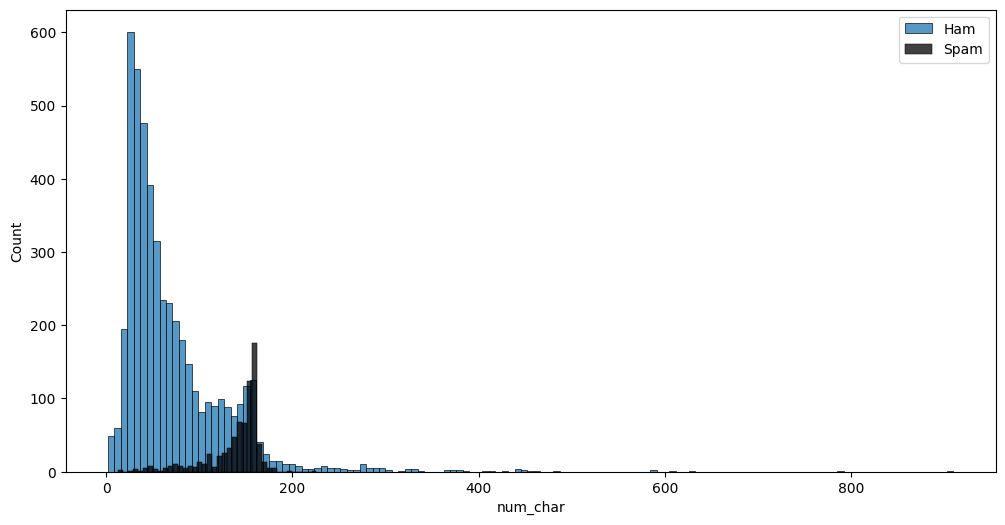

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assumindo que a coluna 'label' representa o alvo (0 for ham, 1 for spam)
# Criando histogramas com base no comprimento do texto:
# Calculando o comprimento do texto e adicione-o como uma nova coluna
df['num_char'] = df['text'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['num_char'], label='Ham')  # Use 'label' instead of 'target'
sns.histplot(df[df['label'] == 1]['num_char'], color='black', label='Spam')  # Use 'label' instead of 'target'
plt.legend()  # Add a legend to distinguish between ham and spam
plt.show()

##Dividindo o dataset entre treino e teste

In [44]:
# Dividindo o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Normalizar os dados (apenas X)
scaler = StandardScaler(with_mean=False) # Configurando with_mean=False para evitar centralização
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

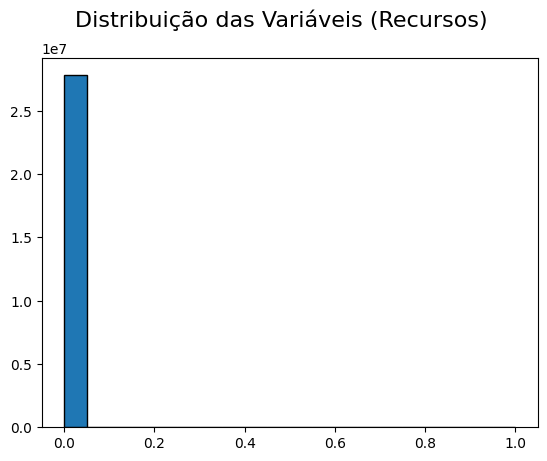

In [46]:
# Assumindo que X é sua csr_matrix
X_dense = X.toarray()  # Convertendo matriz esparsa em uma matriz densa

# plotando o histograma
plt.hist(X_dense.flatten(), bins=20, edgecolor='black')
plt.suptitle('Distribuição das Variáveis (Recursos)', fontsize=16)
plt.show()

In [47]:
# Modelo e validação cruzada
model = MultinomialNB()
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')

print(f"F1-Score médio: {scores.mean()}")

F1-Score médio: 0.8036863483240293


## Treinando e testando o modelo

Treinando o modelo com alguns algoritimos

In [48]:
# K-Nearest Neighbors (KNN)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Fazer predições
y_pred_knn = knn.predict(X_test)

# Avaliação
print("K-Nearest Neighbors")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       965
           1       1.00      0.14      0.25       150

    accuracy                           0.88      1115
   macro avg       0.94      0.57      0.59      1115
weighted avg       0.90      0.88      0.84      1115



In [49]:
# Logistic Regression

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Fazer predições
y_pred_lr = lr.predict(X_test)

# Avaliação
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))

Logistic Regression
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.86      0.91       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [50]:
# Random Forest Classifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Fazer predições
y_pred_rf = rf.predict(X_test)

# Avaliação
print("Random Forest Classifier")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



## Ajustando Hiperparâmetros
Neste caso escolhi trabalhar com KNN

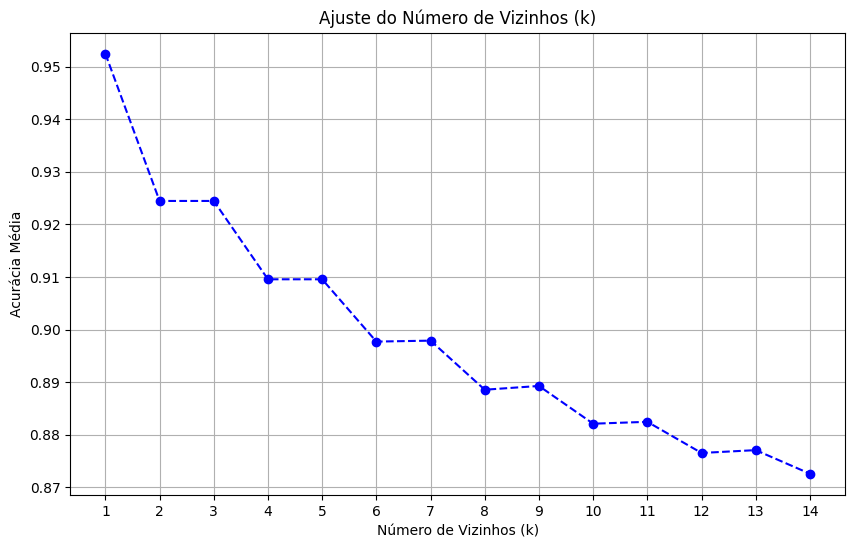

In [51]:
# Testar diferentes valores de k
from sklearn.model_selection import StratifiedKFold # Import if not already done

k_values = range(1, 15)  # Valores de k de 1 a 15
mean_scores = []

# Define cv here:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')
    mean_scores.append(scores.mean())

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o', linestyle='--', color='b')
plt.title('Ajuste do Número de Vizinhos (k)')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia Média')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [52]:
# Treinar KNN com Cross-Validation

#Aqui, usamos a validação cruzada com o modelo KNN para avaliar o desempenho.

# Configurar validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Começando com k=5
scores = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')

# Resultados
print(f"Acurácias por dobra: {scores}")
print(f"Acurácia média: {scores.mean():.4f}")

Acurácias por dobra: [0.90852018 0.91121076 0.90933573 0.90394973 0.91472172]
Acurácia média: 0.9095


In [53]:

# Para melhorar o desempenho, ajuste os hiperparâmetros dos modelos. Exemplos:

#    Para Random Forest: Ajuste n_estimators, max_depth, etc.
#   Para KNN: Teste diferentes valores para n_neighbors.

# Exemplo com GridSearchCV:

# Parâmetros para ajustar no KNN
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_knn.fit(X_train, y_train)

print("Melhores parâmetros para KNN:", grid_knn.best_params_)

Melhores parâmetros para KNN: {'n_neighbors': 3}


In [54]:
# Treinamento Final com o Melhor k

# Após encontrar o melhor valor de k, treine o modelo novamente e avalie o desempenho.

# Melhor KNN
best_k = grid_knn.best_params_['n_neighbors'] # Get best_k from GridSearchCV results
knn_best = KNeighborsClassifier(n_neighbors=best_k)

# Avaliação com validação cruzada
final_scores = cross_val_score(knn_best, X, y, cv=cv, scoring='accuracy')

print(f"Melhor KNN - Acurácias por dobra: {final_scores}")
print(f"Melhor KNN - Acurácia média: {final_scores.mean():.4f}")

Melhor KNN - Acurácias por dobra: [0.92197309 0.9264574  0.92818671 0.92010772 0.92549372]
Melhor KNN - Acurácia média: 0.9244


##Concusão dos testes realizados

A melhor solução será aquela que maximiza o F1-Score, já que ele balanceia precisão e revocação, duas métricas cruciais em um problema de detecção de spam. Um modelo com alto F1-Score, que também apresente boa precisão e revocação, seria a solução ideal.
Se, por exemplo, o modelo KNN com o valor otimizado de k apresentou os melhores resultados (altas pontuações em precisão, recall e F1-Score), seria a melhor escolha.

Conclusão: O modelo ideal depende dos resultados das métricas de avaliação e do equilíbrio entre elas. O melhor modelo deve ser escolhido com base na aplicação específica, considerando o custo dos falsos positivos e falsos negativos no contexto de detecção de spam.



##REFERÊNCIAS

Email Ham/Spam Dataset, 2024 em: https://www.kaggle.com/datasets/satyajeetbedi/email-hamspam-dataset/ Acesso em: 29/11/2024.

Consulta de material. Disponível em: https://www.kaggle.com/code/suhawni/email-spam-classifier. Acesso em: 02/12/2024.

Introdução à Ciência de Dados (Data Science): Didática Tech. Youtube, 2022. Disponível em: https://www.youtube.com/watch?v=sjpBNi4DgI0. Acesso em: 19/09/2024

Como criar um projeto de Data Science do zero para seu Portfólio | Hipsters: Portfólio Dev. Youtube, 2024. Disponível em: https://www.youtube.com/watch?v=hV3ORe7F8Q4. Acesso em: 18/09/2024
